# Homework



In [0]:
# Evaluation
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

# Tradition



In [0]:
#******************INIT*******************
!pip install -U torch torchvision numpy opencv-python



# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip


!git clone https://github.com/szykry/CVML_HW.git

# Set root folder
import os
name = "/content/HW/"
os.chdir(name)
!pwd

 #OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

#*******************END OF INIT*************

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
     |████████████████████████████████| 28.2MB 110kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
--2020-05-22 14:30:04--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14446460 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[=================

In [0]:
# Get all subfolders in a directory
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]

In [0]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1(path, "*.extension"))

In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:322: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

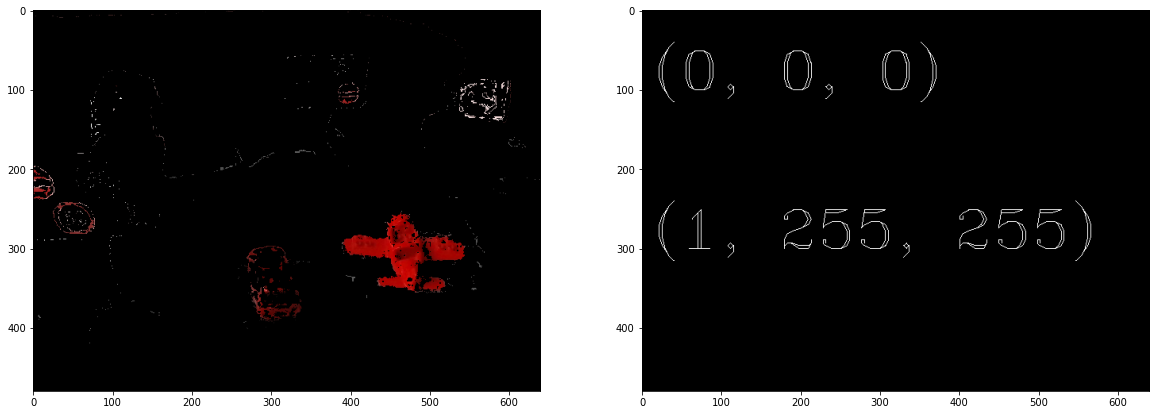

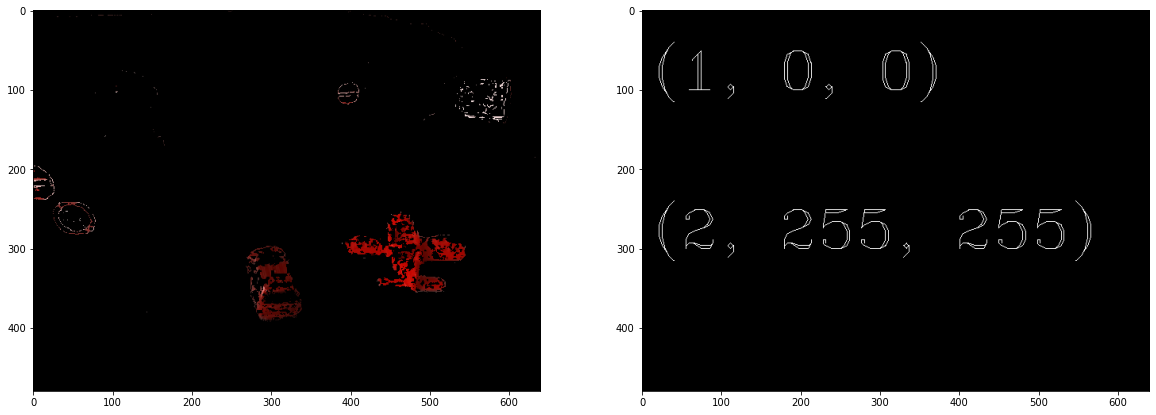

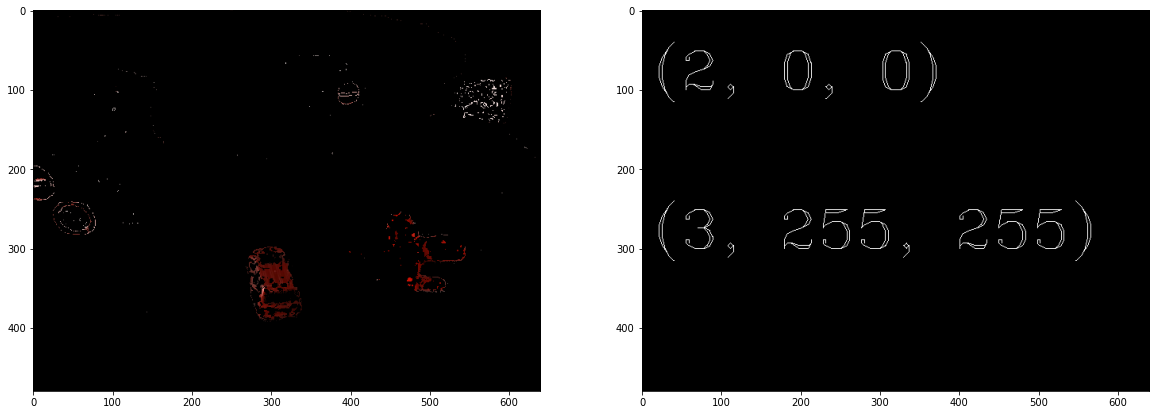

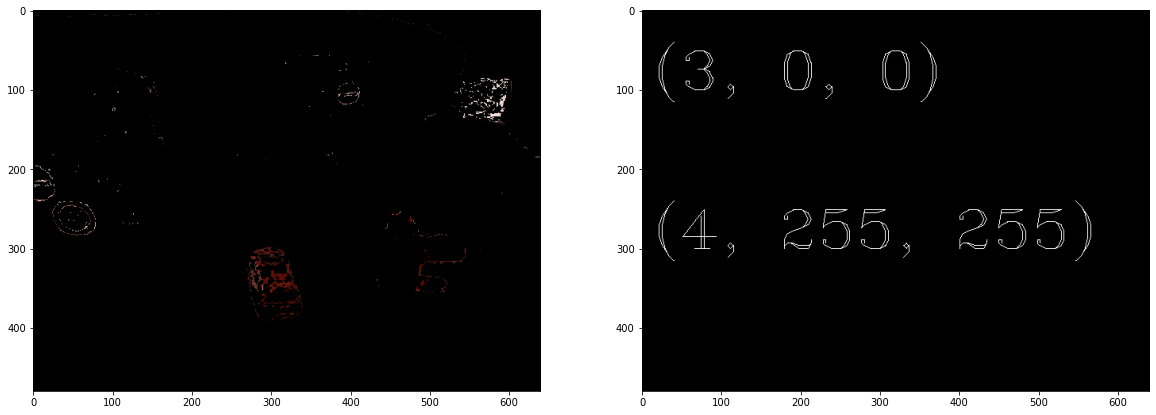

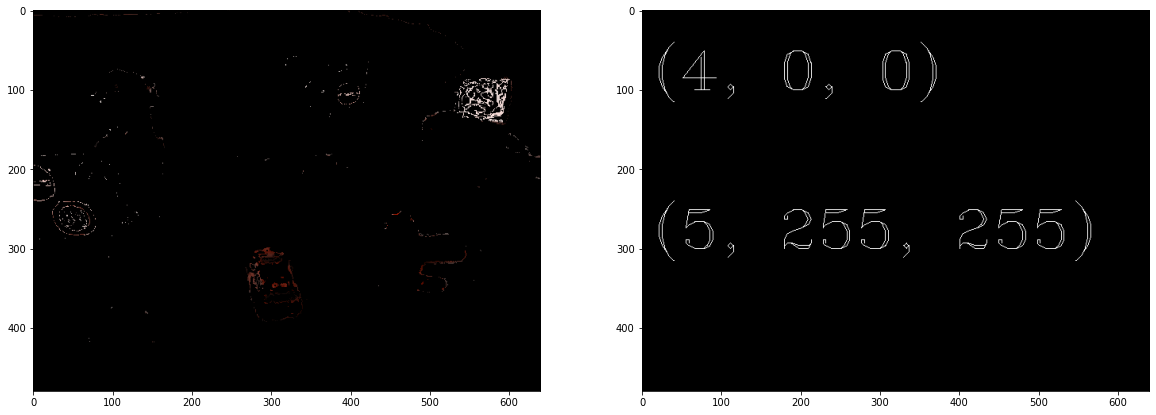

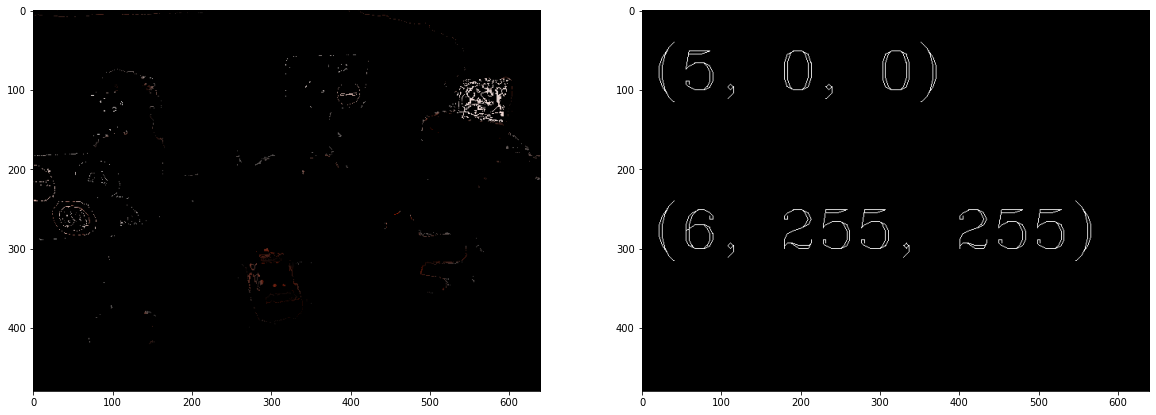

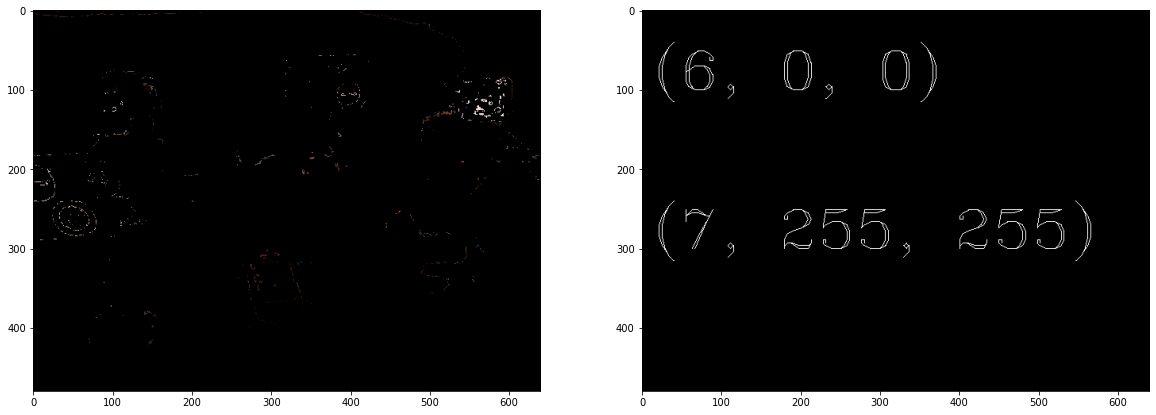

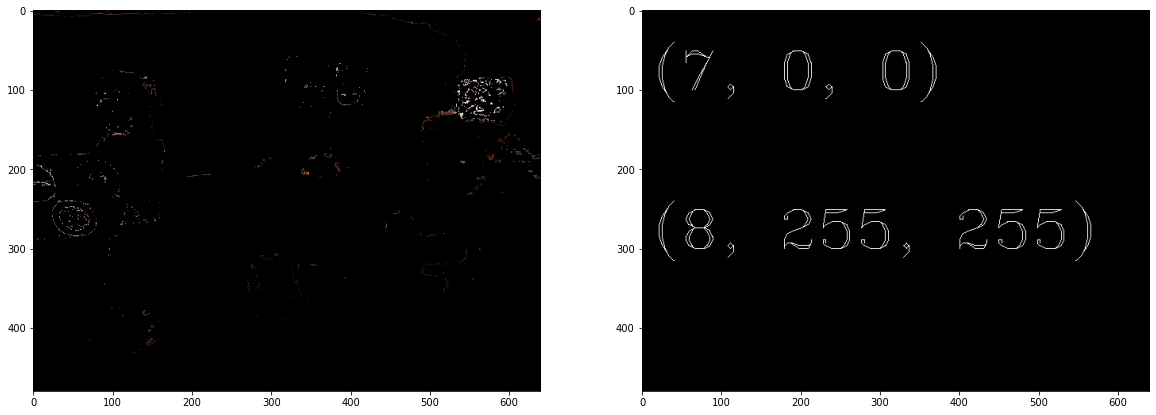

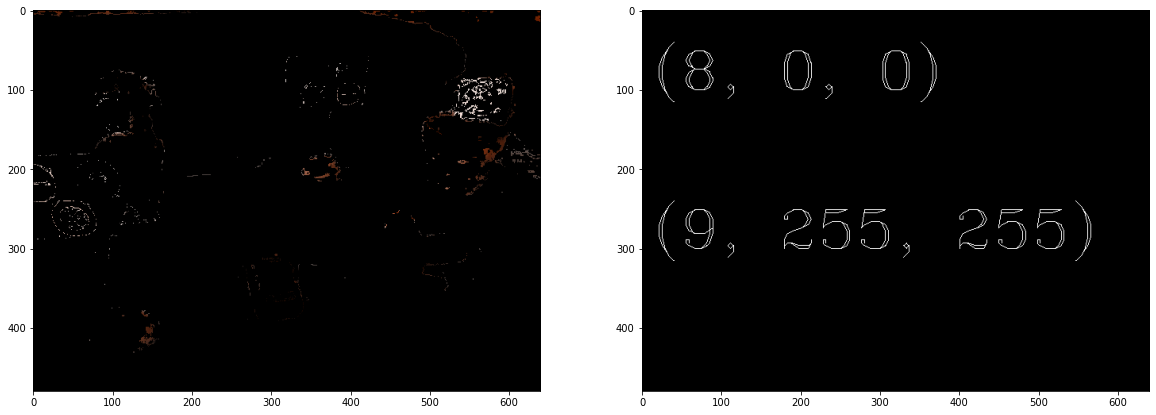

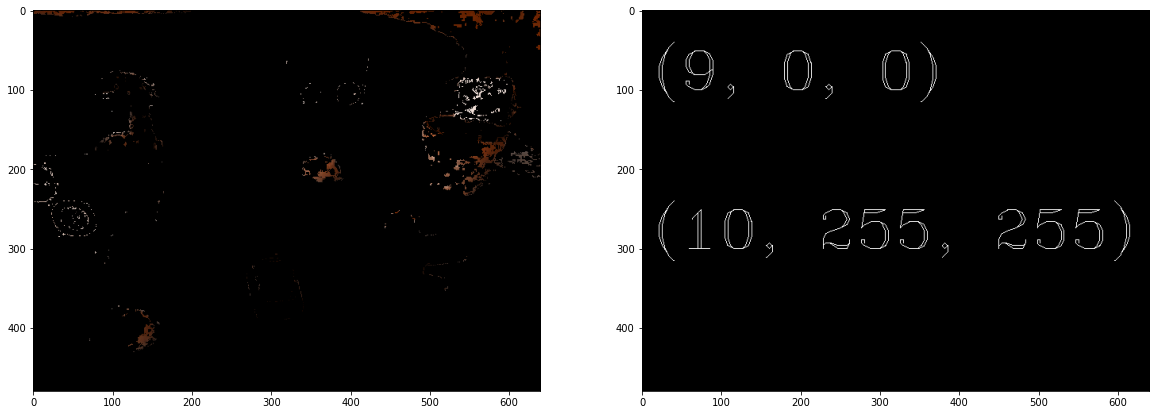

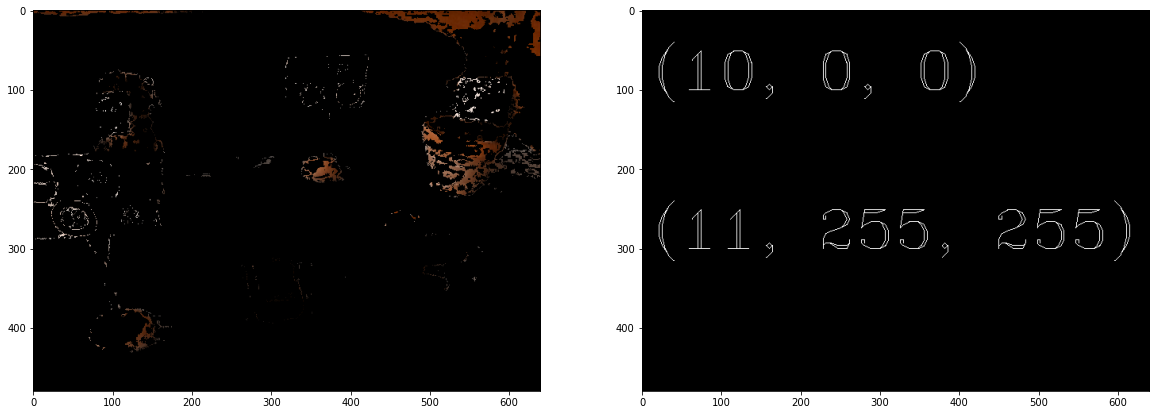

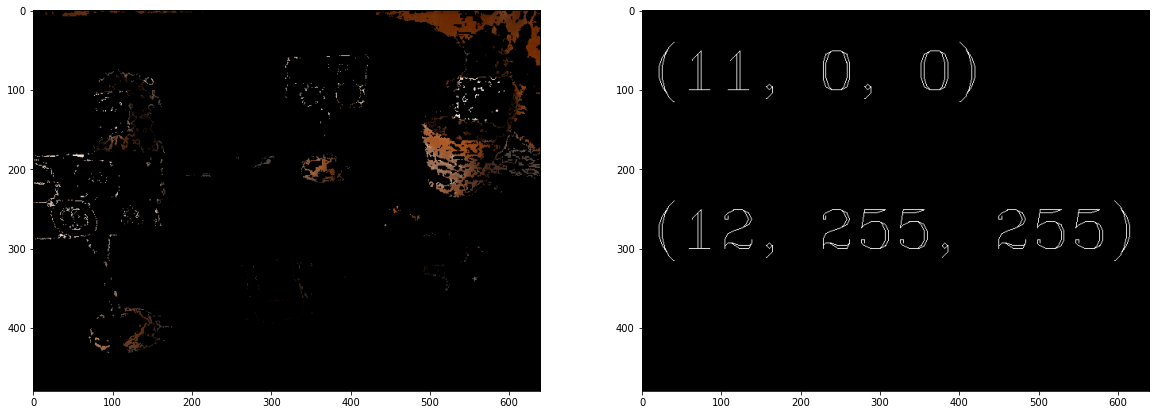

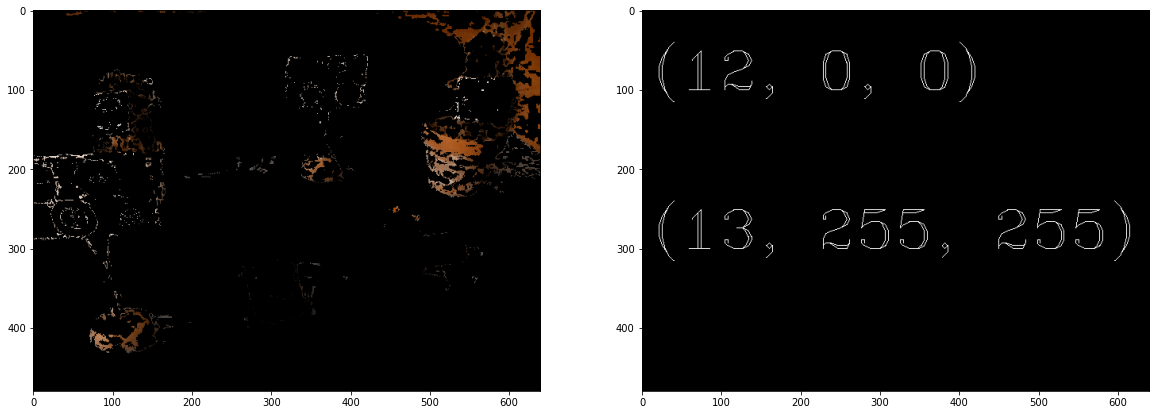

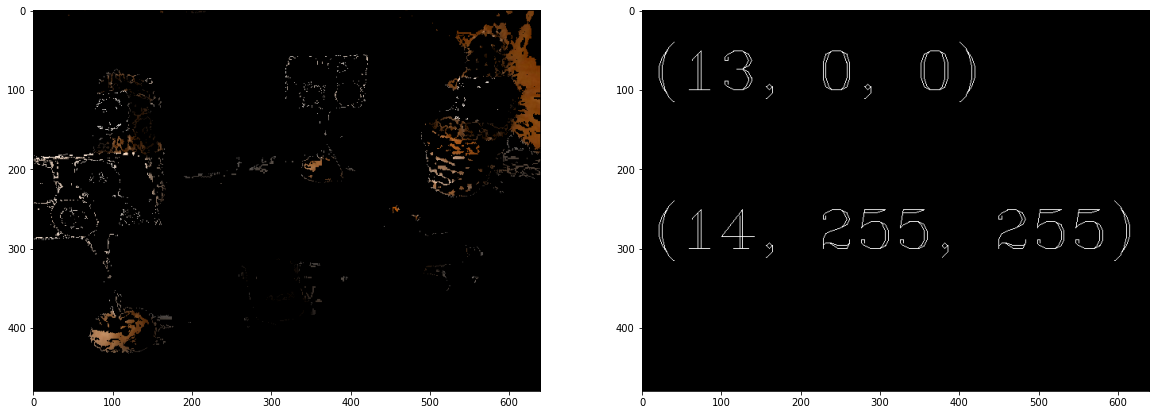

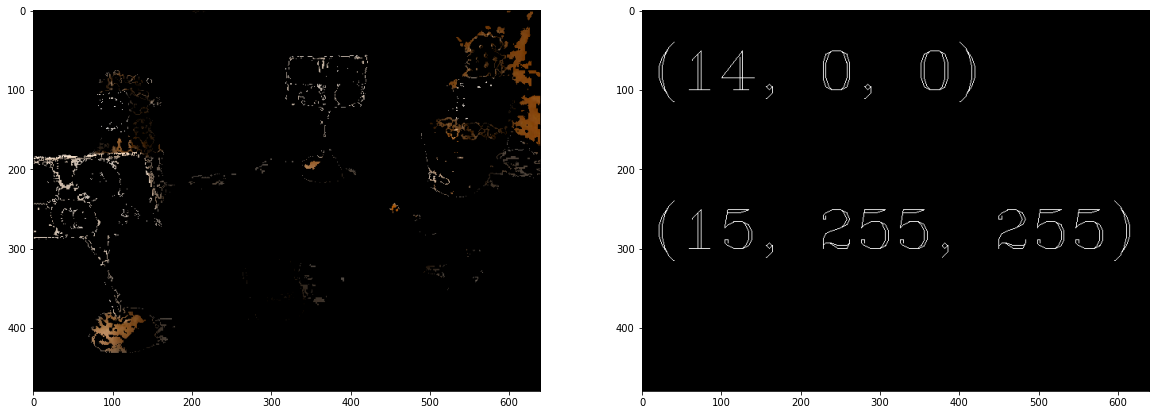

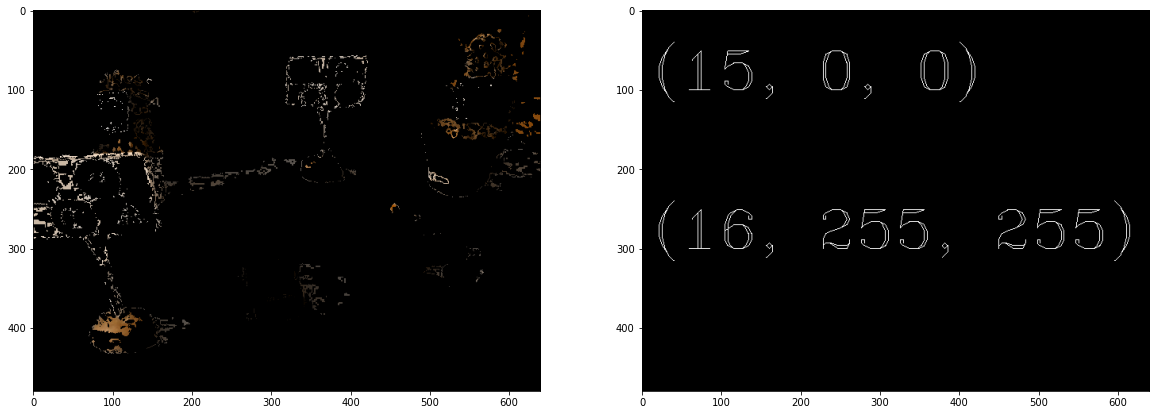

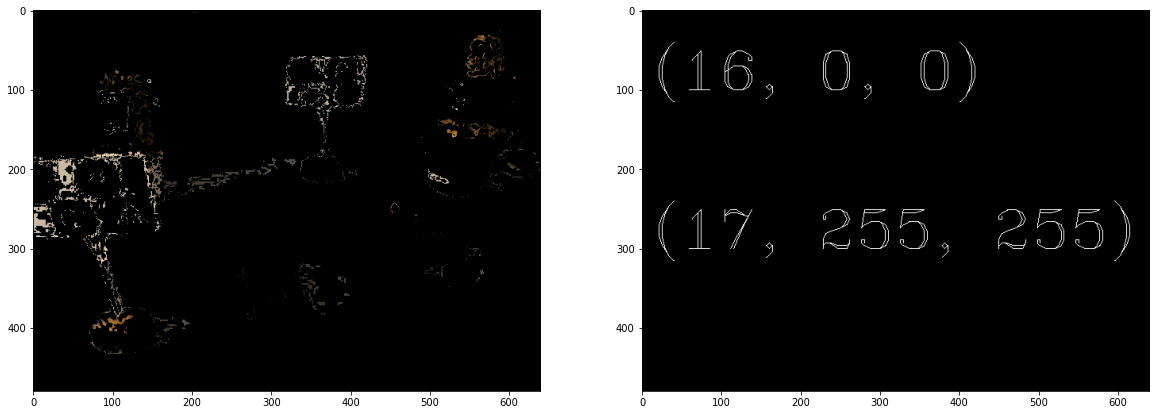

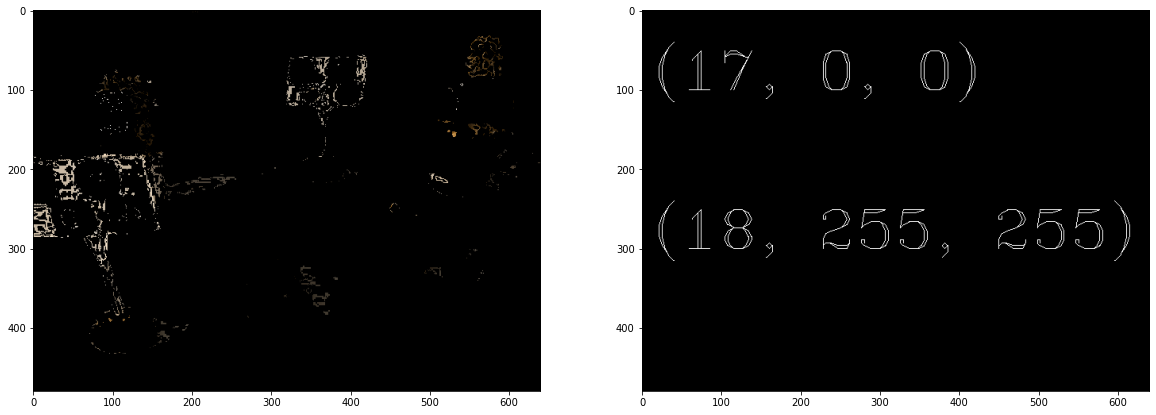

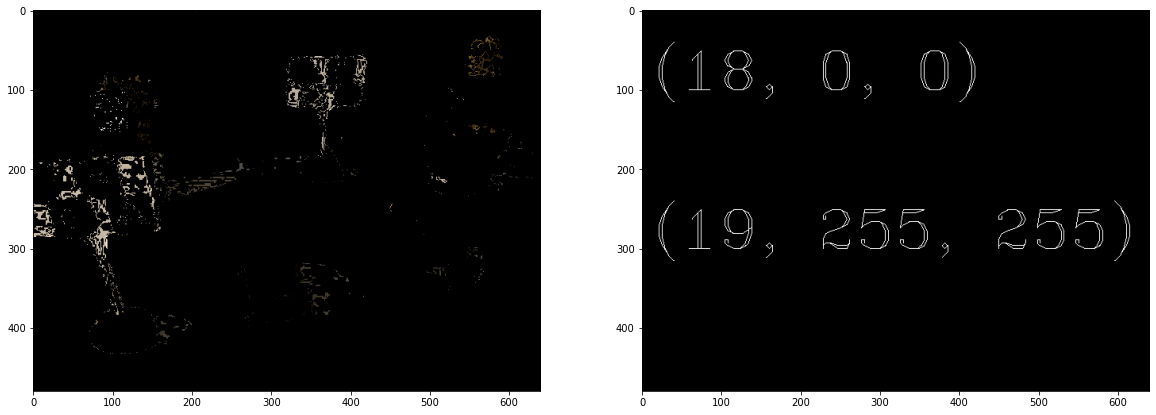

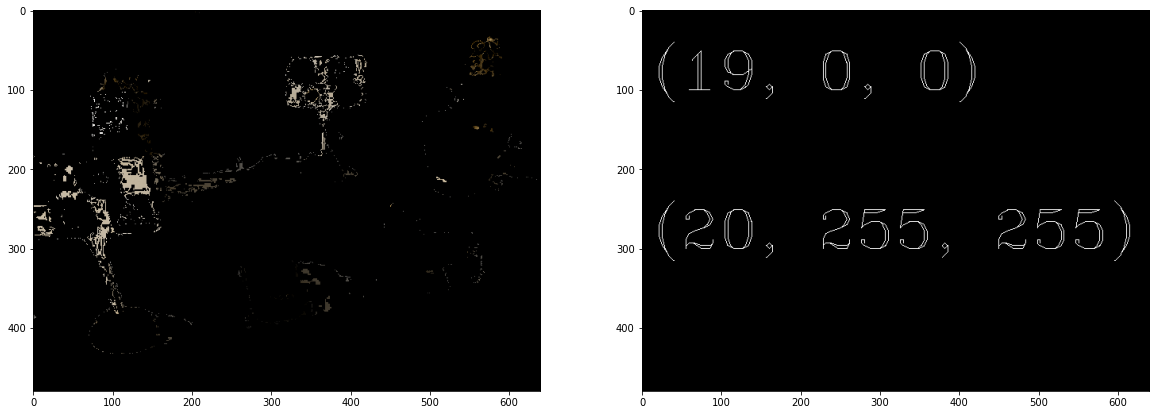

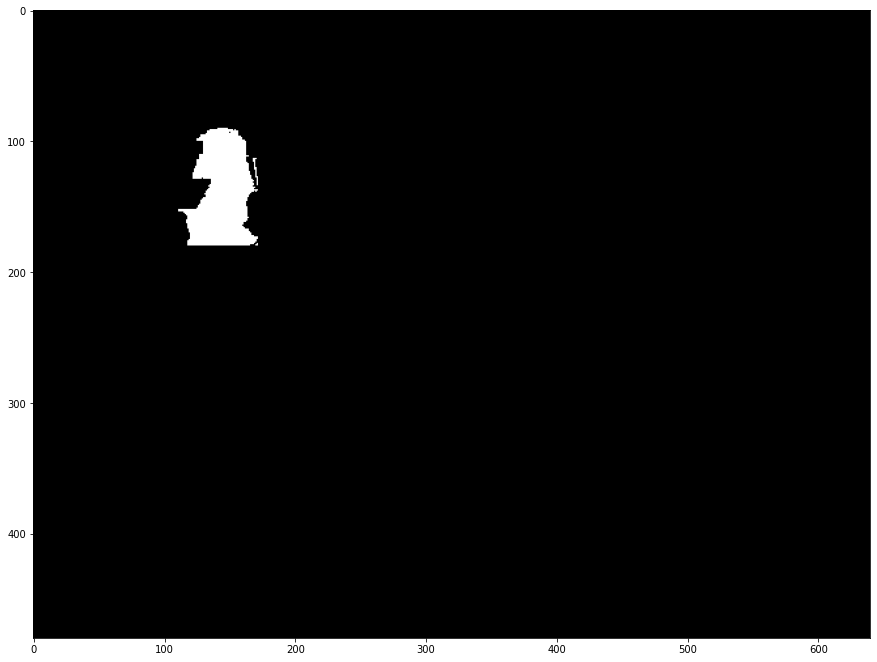

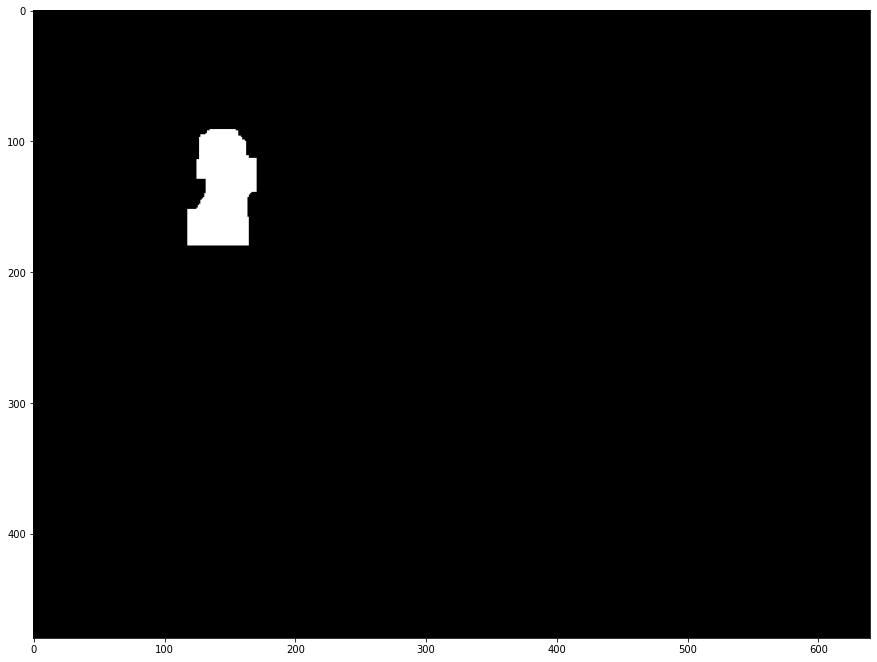

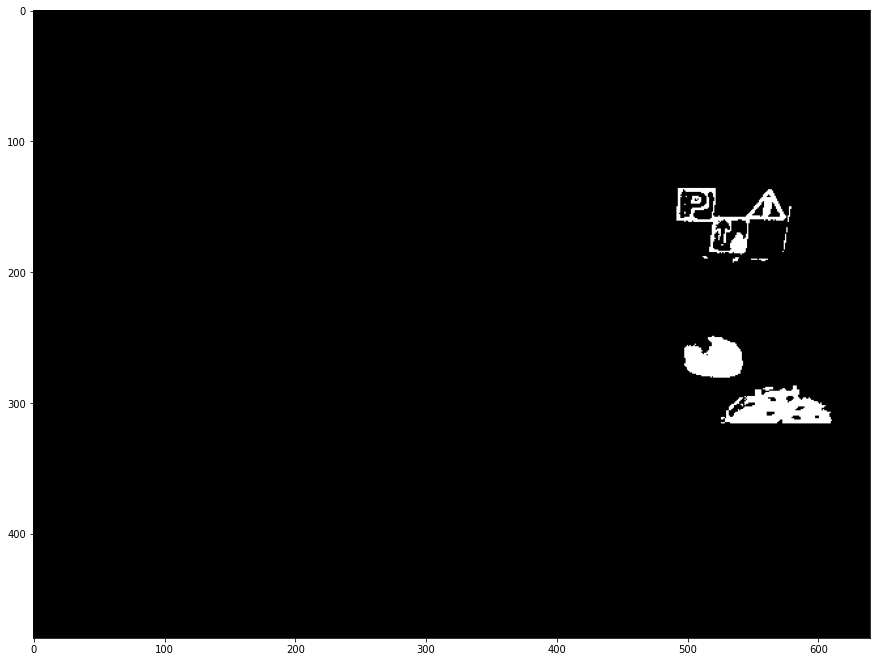

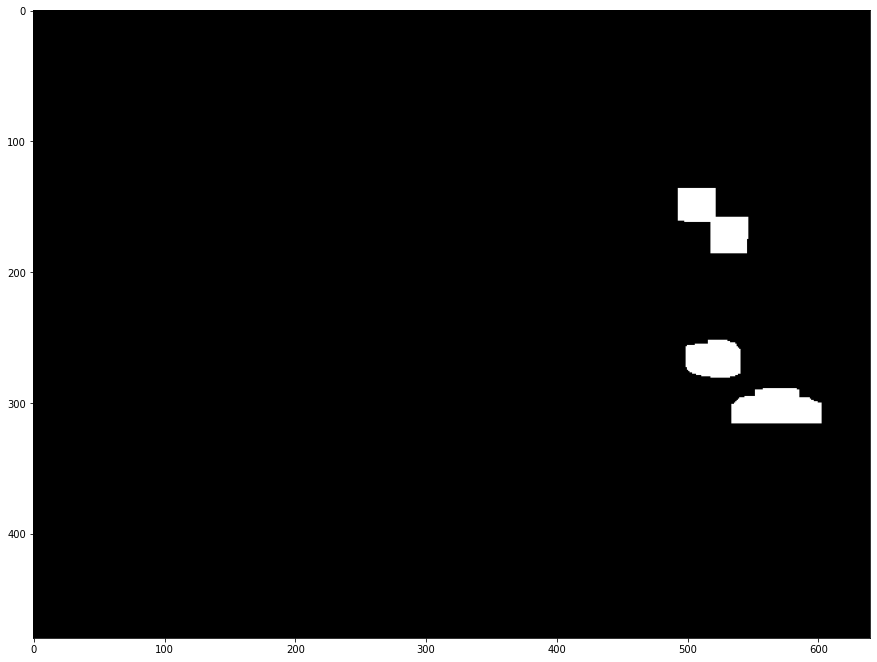

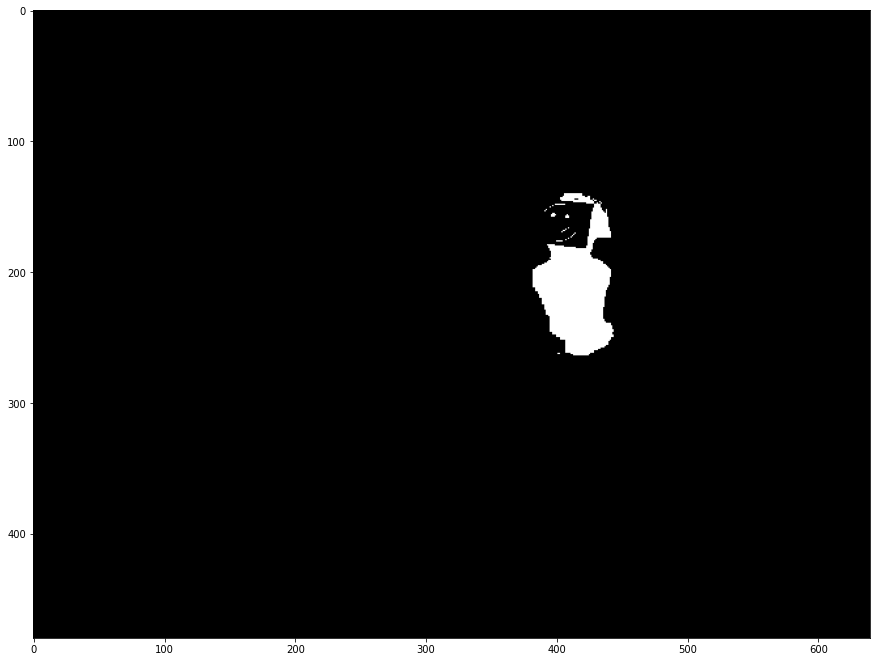

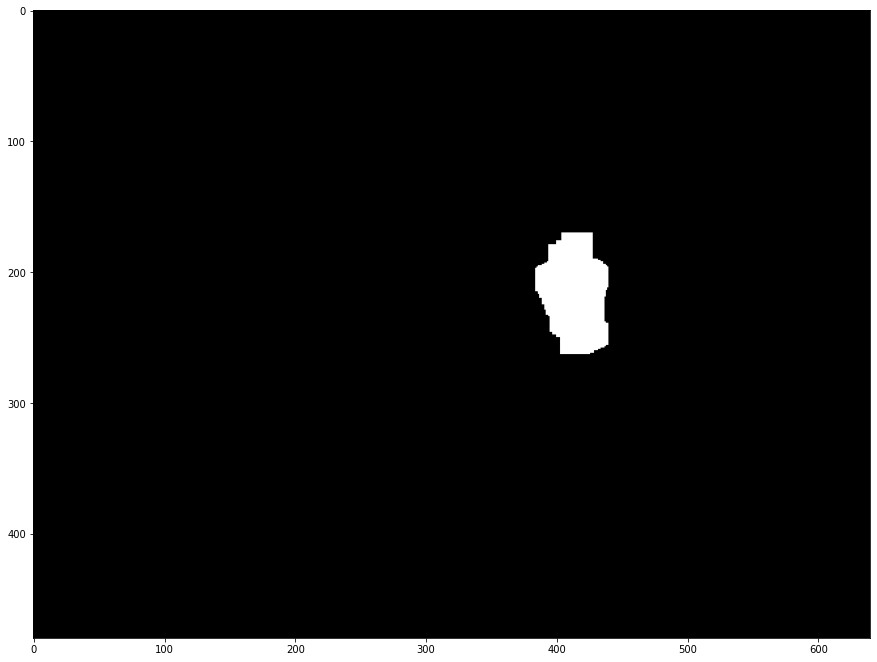

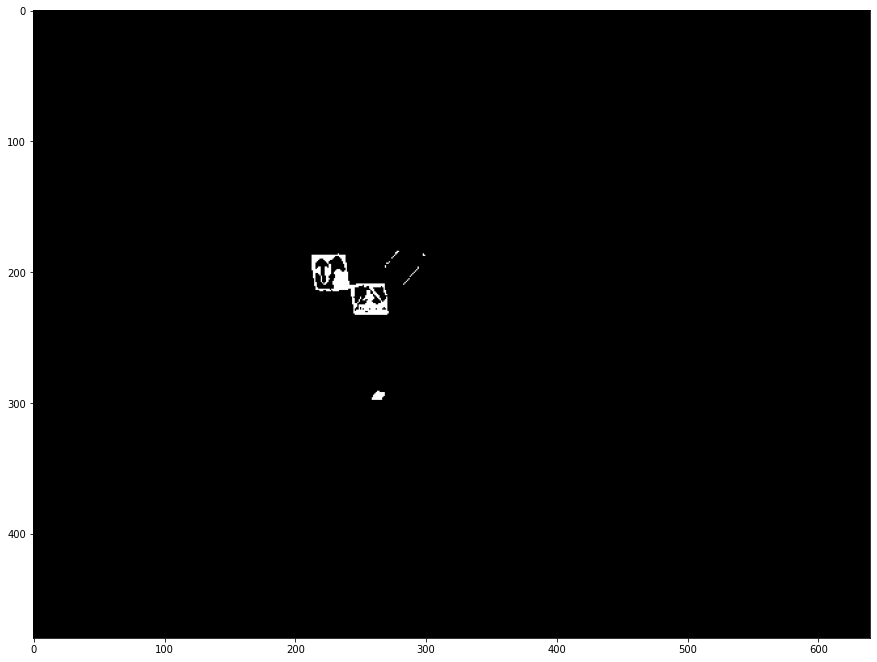

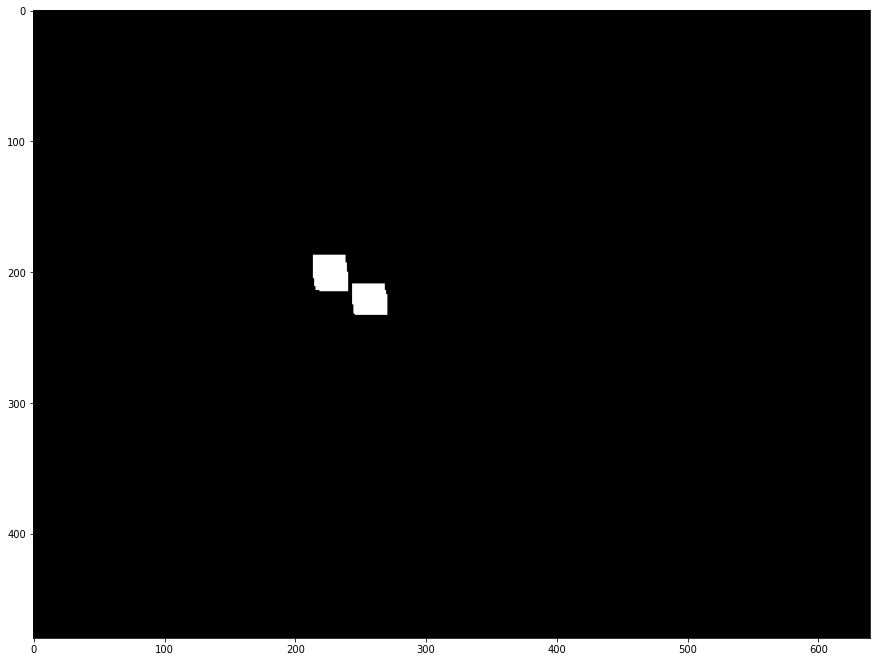

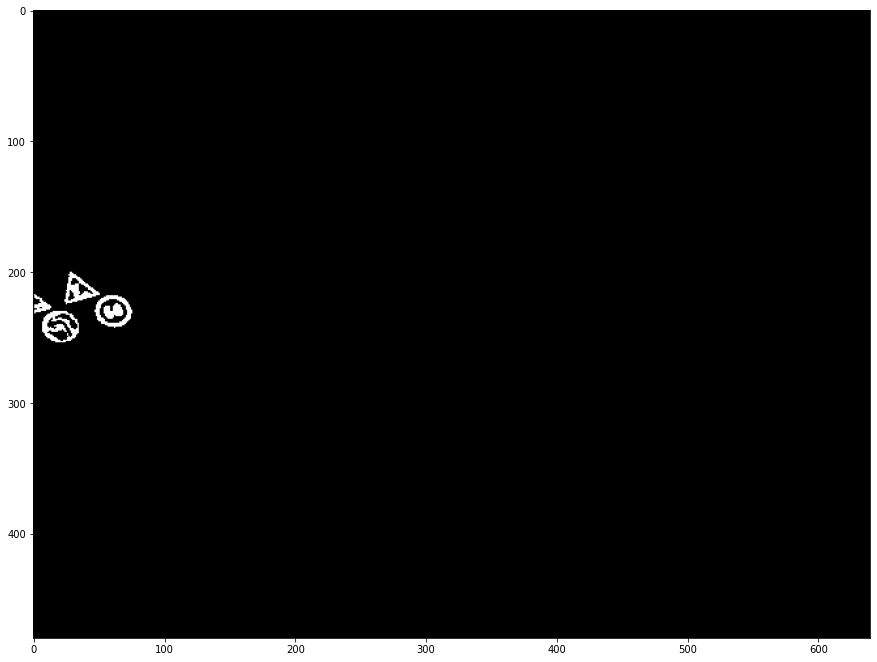

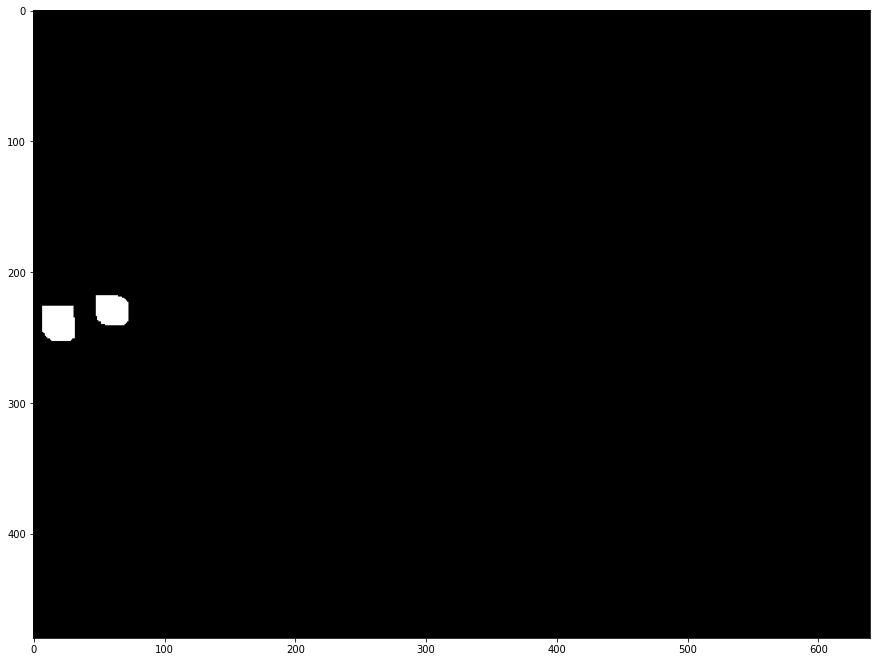

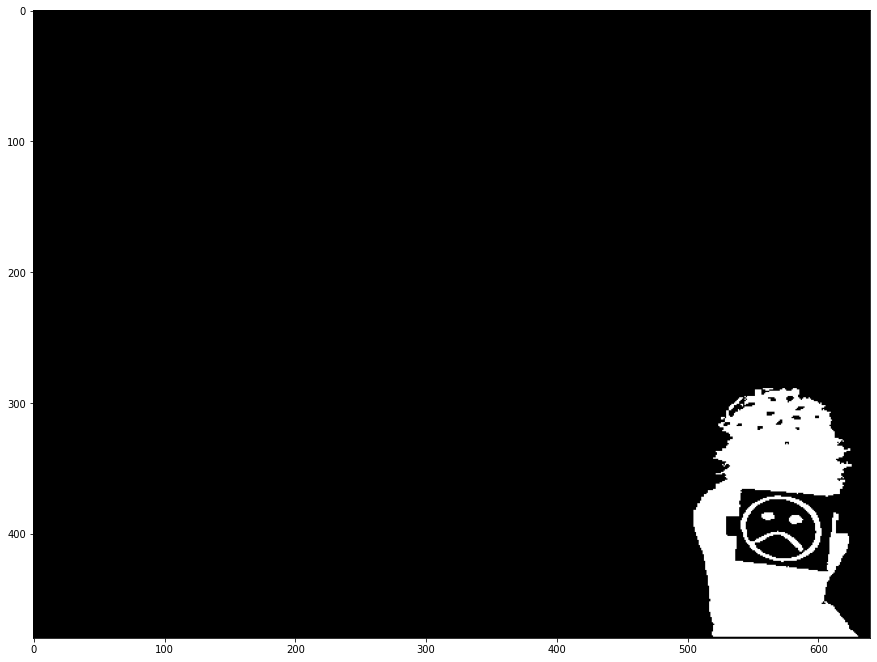

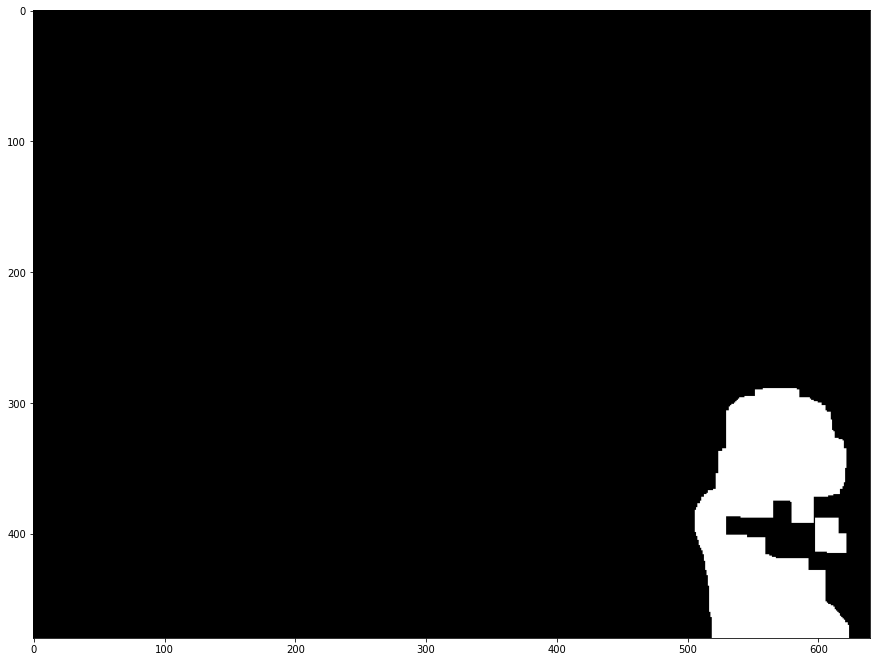

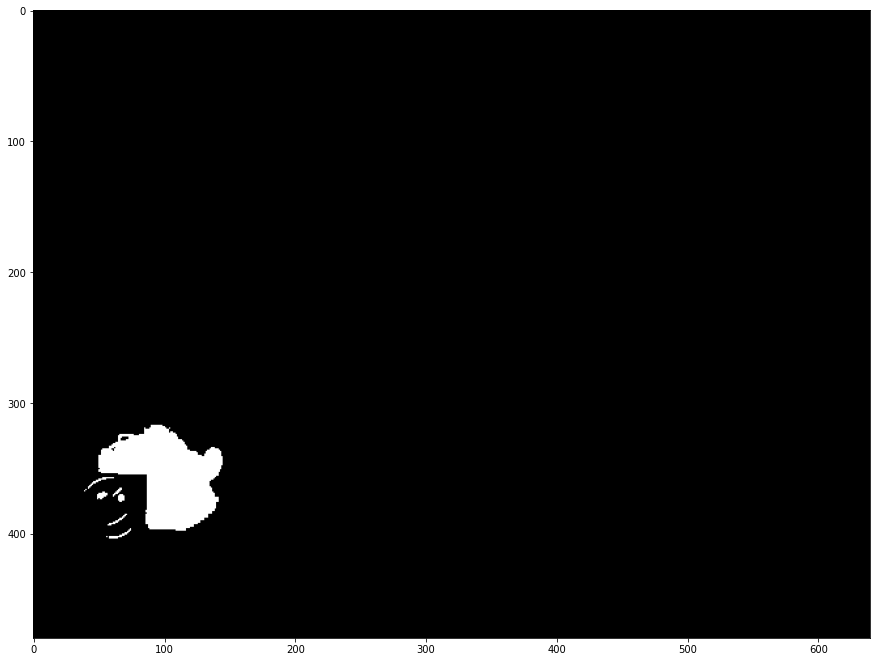

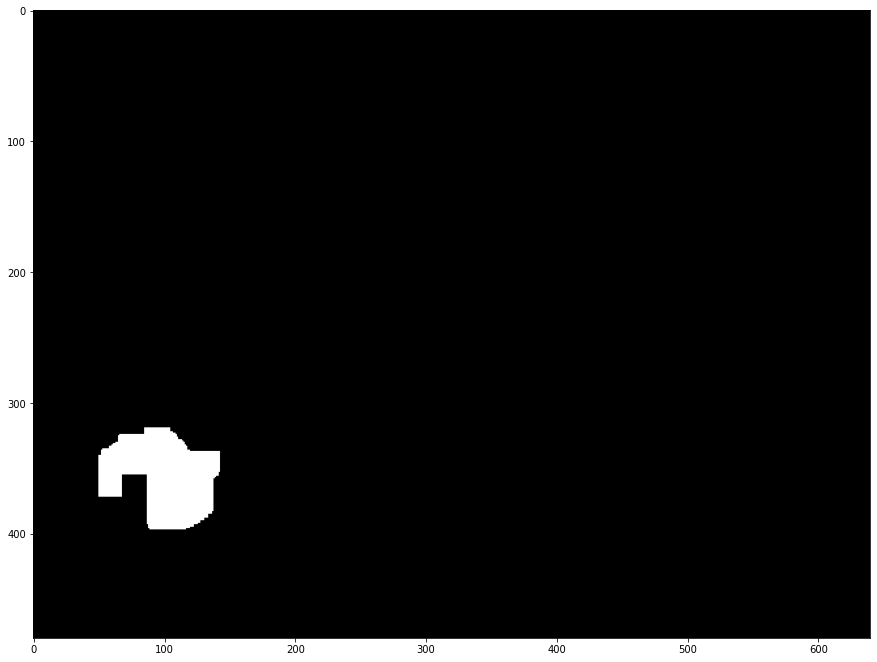

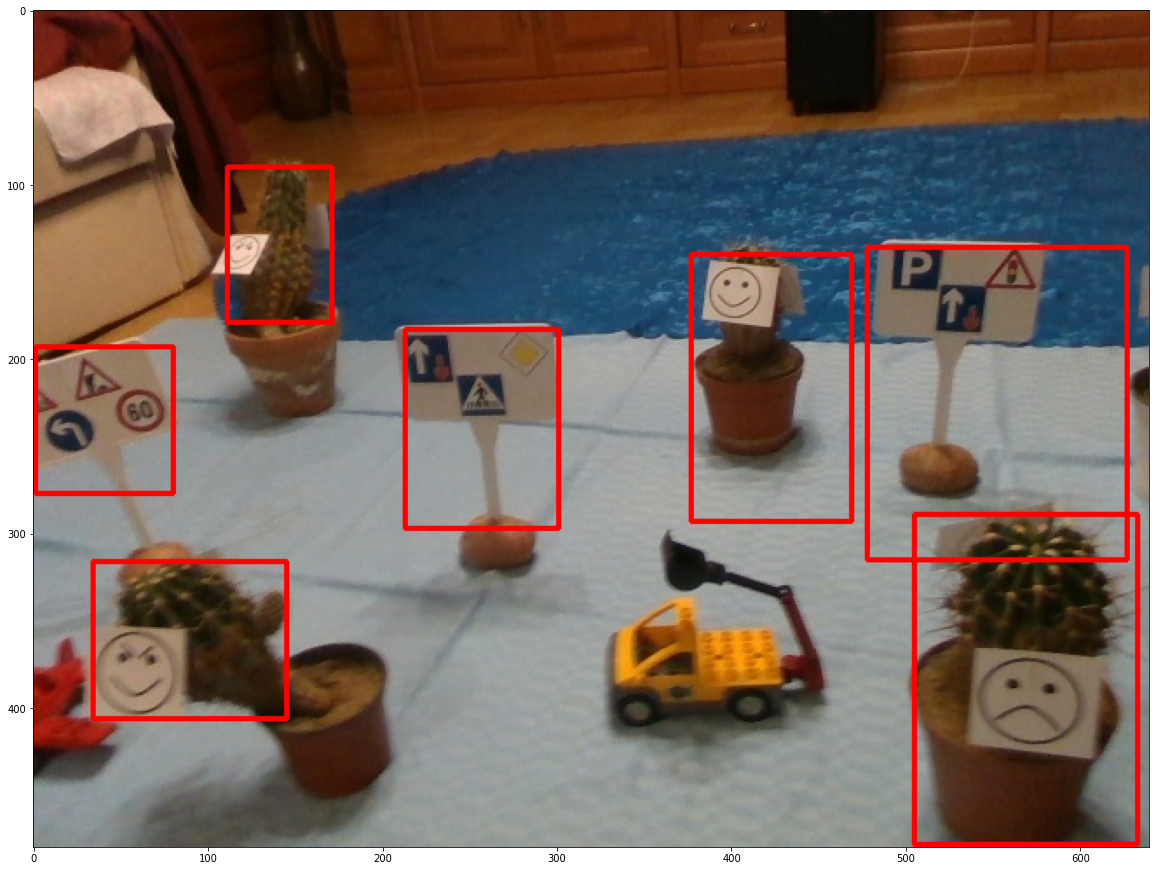

In [0]:
#params:
#   - image: the image to use
#   - isRGB: shows if the input is RGB
#   - parameterIndex: the index of the value in the imageStruct (in case of isRGB == True -> 0:R 1:G 2:B)
#   - fromValue: the start value of the measurement
#   - stepValue: the value of one step
#   - steps: determine the number of the steps
#   - offset: set an offset, it works like a preMasking (ex. ((0,0,0),(255,255,120))) (has no affect on the value you want to measure)
def showSpektrumMask(image, isRGB, parameterIndex, fromValue, stepValue, steps, offset = ((0,0,0),(255,255,255))):
    lower_range = offset[0]
    upper_range = offset[1]
    for i in range(0,steps):

      tempList = list(lower_range)
      tempList[parameterIndex] = i * stepValue
      lower_range = tuple(tempList)

      tempList = list(upper_range)
      tempList[parameterIndex] = (i+1)*stepValue
      upper_range = tuple(tempList)

      maszk=cv2.inRange(image, lower_range, upper_range)
      out = cv2.bitwise_and(image,image,mask = maszk)

      if(isRGB==False):
        out = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
      plt.figure(figsize=(20,20))
      plt.subplot(1,2,1)
      plt.imshow(out,cmap='gray')
      plt.subplot(1,2,2)
      felirat = out.copy()
      felirat = cv2.cvtColor(felirat, cv2.COLOR_HSV2BGR)
      felirat = cv2.cvtColor(felirat, cv2.COLOR_BGR2GRAY)
      felirat = cv2.bitwise_xor(felirat,felirat,mask = felirat)
      felirat = cv2.cvtColor(felirat, cv2.COLOR_GRAY2BGR)
      low=str(lower_range)
      cv2.putText(felirat,str(lower_range),(10,100),cv2.FONT_HERSHEY_COMPLEX_SMALL,3.75,(255,255,255))
      cv2.putText(felirat,str(upper_range),(10,300),cv2.FONT_HERSHEY_COMPLEX_SMALL,3.75,(255,255,255))
      plt.imshow(felirat,cmap='gray')



img = cv2.imread("../HW/g4/rgb/116.jpg")   # 2.param: RGB, Grayscale, Bináriskép
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

showSpektrumMask(img_rgb, False, 0, 0, 1, 20)

def minMaxLoc(img):
  Xmin = 999;
  Xmax = 0;
  Ymin = 999;
  Ymax = 0;
  
  for i in range(img.shape[0]):
    sor =img[i,:]
    mean=np.count_nonzero(sor)
    if ((Ymin == 999) & (mean > 0)):
      Ymin=i
    if ( mean > 0):
      Ymax = i

  for i in range(img.shape[1]):
    oszlop =img[:,i]
    mean=np.count_nonzero(oszlop)
    if ((Xmin == 999) & (mean > 0)):
      Xmin=i
    if ( mean > 0):
      Xmax = i

  return Xmin,Xmax,Ymin,Ymax

def watershed(edges,img,debug=False):
  kernel = np.ones((3,3),np.uint8)
  #widen edges to make them touch
  edges = cv2.dilate(edges, kernel,iterations=1)

  ret, thresh = cv2.threshold(edges,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(thresh,cmap='gray')

  sure_fg = cv2.erode(thresh,kernel,iterations=1)
  sure_bg = cv2.dilate(thresh,kernel,iterations=1)

  # Uncertain region(borders)
  unknown = cv2.subtract(sure_bg,sure_fg)

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(sure_fg,cmap='gray')

  # Label separate foreground pathes
  ret, markers = cv2.connectedComponents(sure_fg)
      
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(markers)
    
  # Runwatershed
  markers = cv2.watershed(img,markers)
  if debug:
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(markers)
    plt.subplot(1,2,2)
    plt.imshow(img)

  return markers

def makeBoundingBox(image):
  imagecopy = image.copy()
  imagecopy = cv2.cvtColor(imagecopy,cv2.COLOR_RGB2GRAY)
  imagecopy[imagecopy != 0] = 255;

  xmin,xmax,ymin,ymax = minMaxLoc(imagecopy)

  rect = (xmin,ymin,xmax-xmin,ymax-ymin)

  #rects = objFinder(imagecopy,100,10,10)

  #for i in range(len(rects)):
  #color = (255,255,0)
  #cv2.rectangle(imagecopy, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), color, 2)


  #plt.figure(figsize=(20,20))
  #plt.imshow(imagecopy,cmap='gray')
  return rect
  #contours,  = cv2.findContours(imgcopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#def findTrafficSigns(image,boundingboxes):

def cropper(image,boundingbox,depth_filter):
  #imagecopy = image.copy()
  image2    = image.copy()
  depthfilter = cv2.cvtColor(depth_filter,cv2.COLOR_BGR2GRAY)
  depthfilter[depthfilter>0]=1

  #imagecopy = cv2.cvtColor(imagecopy,cv2.COLOR_BGR2HSV)
  img_gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

  start = (int(boundingbox[0]),int(boundingbox[1]))
  end   = (int(boundingbox[0]+boundingbox[2]) , int(boundingbox[1]+boundingbox[3]))
  mask  = np.zeros(image.shape,dtype=np.uint8)
  mask  = cv2.rectangle(mask,start, end,(255,255,255),-1)
  mask  = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)

  img_gray = np.where(img_gray>110,0,1)
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=mask).astype('uint8')
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=depthfilter).astype('uint8')
  
  plt.figure(figsize=(15,15))
  plt.imshow(img_gray,cmap='gray')

  kernel  = np.ones((3,3),np.uint8)
  #img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel,iterations=1)
  img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel,iterations=5)
  img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel,iterations=7)

  plt.figure(figsize=(15,15))
  plt.imshow(img_gray,cmap='gray')

  edges = cv2.Canny(img_gray,30,120)
  contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  #edges = cv2.erode(edges,kernel, iterations=1)
  
  rects = [None]*len(contours)
  for i,c in enumerate(contours):
    (x,y,w,h) = cv2.boundingRect(c)
    #if (w>20) & (w<40) & (h>20) & (h<40):
    #if (w<40) & (h<40):
    if cv2.arcLength(c,True)<400:
      cv2.rectangle(img_gray,(x,y),(x+w,y+h),(255,255,255),1)

  cv2.drawContours(image2,contours,-1,(0,255,0),1)

#************************************************************************ MAIN ************************************************************************

def depth_segmenter(inputImage, inputDepthImage, debug=False):
  # Read images
  img = inputImage.copy()
  depth = inputDepthImage.copy()

  sor =depth[0,:]
  legelsoAtlag=np.true_divide(sor.sum(),np.count_nonzero(sor))

  #hatsoMaszk=cv2.inRange(depth, legelsoAtlag*0.9, np.amax(depth))
  hatsoMaszk =  np.zeros((480,640)).astype("uint8")
  hatsoMaszk[depth<legelsoAtlag*0.6]=[1]

  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(hatsoMaszk,cmap='gray')

  # convert to RGB
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  lower_range = np.array([90,0,0])
  upper_range = np.array([120,255,220])

  maszk=cv2.inRange(img_hsv, lower_range, upper_range)

  maszkNegative = cv2.bitwise_not(maszk)
  
  if debug:
    out = cv2.bitwise_and(img_hsv,img_hsv,mask = maszkNegative)
    plotolni = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(20,20))
    plt.imshow(plotolni,cmap='gray')

  hue_channel = img_hsv[:,:,0]
  avg_hue = np.average(hue_channel)
  asdasd, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.uint8)
  maszkDilation = cv2.erode(hue_channel_segment,kernel,iterations = 2)

  maszkDilation = cv2.bitwise_not(maszkDilation)
  maszkNegative = cv2.bitwise_and(maszkDilation,maszkDilation,mask = maszkNegative)
  maszkNegative = cv2.bitwise_and(maszkNegative,maszkNegative,mask = hatsoMaszk)
  
  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(maszkNegative,cmap='gray')

  # calculate foreground
  for i in range(depth.shape[0]):
    sor =depth[i,:]
    mean=np.true_divide(sor.sum(),np.count_nonzero(sor))
    sor[sor>mean-20]=0

  # for some reason doesn't work without this
 # depth2[depth==0]=0
 # img_rgb = np.where(depth2 != 0, img_rgb, [0,0,0])

  # Figure with subplots
  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb) 
    plt.subplot(1,2,2)
    plt.imshow(depth,cmap='gray')

  # convert to uint8 from uint16
  cv2.normalize(depth, depth, 0, 255, cv2.NORM_MINMAX)
  depth=depth.astype('uint8')
  depth_8 = cv2.cvtColor(depth, cv2.COLOR_GRAY2BGR)

  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(depth_8) 

  kernel = np.ones((3,3),np.uint8)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_OPEN,  kernel, iterations = 3)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  Atlag=np.true_divide(sor.sum(),np.count_nonzero(sor))
  depth_8[depth_8 > Atlag*2.2]=[0]

  depth_out = depth_8

  depth_8 = cv2.bitwise_and(depth_8,depth_8,mask = maszkNegative)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  if debug: 
    plt.subplot(1,2,2)
    plt.imshow(depth_8,cmap='gray')

  # get edges
  edges = cv2.Canny(depth_8,50,120)
  markers = watershed(edges,img,debug=debug)

  ####
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  boundingRects=[]
  for i in np.unique(markers):
    if i<2 :
      continue

    imgcopy=img.copy()
    imgcopy[markers!=i]=[0,0,0]  
    xmin,xmax,ymin,ymax = minMaxLoc(imgcopy)

    if ((xmax-xmin > 500) & (ymax-ymin > 350)):
      continue
    
    imgcopy = cv2.bitwise_and(imgcopy,imgcopy,mask = maszkNegative)

    if np.count_nonzero(imgcopy)<3600:
      continue

    #if np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0]))<4200:
    #  continue
    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(imgcopy)
      print(str(i)+":"+str(np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0])))+"........\t"+str(np.count_nonzero(imgcopy))+"minmax:"+str(xmin)+" "+str(xmax)+" "+str(ymin)+" "+str(ymax))
  
    boundingRects.append(makeBoundingBox(imgcopy))

  for i in range(len(boundingRects)):
    color = (255,0,0)
    start = (int(boundingRects[i][0]),int(boundingRects[i][1]))
    end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3]))
    img2 = cv2.rectangle(img2, start, end, (255,0,0), 2)

  return img2, boundingRects, depth_8, depth_out

imgBe   = cv2.imread("../HW/g1/rgb/186.jpg")
depthBe = cv2.imread("../HW/g1/depth/186.png", -1)

ret,brs,dfilter = depth_segmenter(imgBe, depthBe, debug=False)

for b in brs:
  cropper(imgBe,b,dfilter)

plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')